In [1]:
import os
import sys

home=os.path.expanduser("~")
os.environ["SPARK_HOME"]=os.path.join(home, 'spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

In [3]:
originalMovie = spark.read.csv('data/BigData_171024_191024_toCSV.csv', encoding = 'euc-kr')

In [4]:
originalMovie = originalMovie.drop('_c0')
originalMovie = originalMovie.drop('_c1')
originalMovie = originalMovie.drop('_c2')
originalMovie = originalMovie.drop('_c3')
originalMovie = originalMovie.drop('_c4')
originalMovie = originalMovie.drop('_c6')
originalMovie = originalMovie.drop('_c8')
originalMovie = originalMovie.drop('_c9')
originalMovie = originalMovie.drop('_c10')
originalMovie = originalMovie.drop('_c11')
originalMovie = originalMovie.drop('_c12')
originalMovie = originalMovie.drop('_c13')
originalMovie = originalMovie.drop('_c14')
originalMovie = originalMovie.drop('_c15')

originalMovie.printSchema()

root
 |-- _c5: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)



In [5]:
from pyspark.sql import Row

def commaDelete(digit):
    ret = ''
    for ichar in digit:
        if ichar != ',':
            ret += ichar
    return ret

def commaCount(actors):
    cnt = 0
    for idigit in actors:
        if idigit == ',':
            cnt += 1
    return cnt

def getOneDirector(director):
    ret = ''
    directors = director.split(',')
    ret = directors[0]
    return ret

def fiveActors(actors):
    ret = list()
    actor = actors.split(',')
    for i in range(0, 4):
        ret.append(actor[i])
    ret.append(actor[4])
    return ret

cleanedMovie = list()

for movieRow in originalMovie.collect():
    if movieRow._c5 != '0' and movieRow._c7 != '0' and len(movieRow._c16) >= 1 and commaCount(movieRow._c17) >= 4:
        actors = fiveActors(movieRow._c17)
        cleanedMovie.append([int(commaDelete(movieRow._c5)), int(commaDelete(movieRow._c7)), getOneDirector(movieRow._c16), \
                                   actors[0], actors[1], actors[2], actors[3], actors[4]])

In [6]:
actorToDigit = dict()
directorToDigit = dict()

for elem in cleanedMovie:
    # 감독 평균 관객 동원 수 세기
    if elem[2] not in directorToDigit:
        directorToDigit[elem[2]] = [elem[1], 1]
    else:
        directorToDigit[elem[2]][0] += elem[1]
        directorToDigit[elem[2]][1] += 1
    # 배우 평균 관객 동원 수 세기
    if elem[3] not in actorToDigit:
        actorToDigit[elem[3]] = [elem[1], 1]
    else:
        actorToDigit[elem[3]][0] += elem[1]
        actorToDigit[elem[3]][1] += 1
    if elem[4] not in actorToDigit:
        actorToDigit[elem[4]] = [elem[1], 1]
    else:
        actorToDigit[elem[4]][0] += elem[1]
        actorToDigit[elem[4]][1] += 1
    if elem[5] not in actorToDigit:
        actorToDigit[elem[5]] = [elem[1], 1]
    else:
        actorToDigit[elem[5]][0] += elem[1]
        actorToDigit[elem[5]][1] += 1
    if elem[6] not in actorToDigit:
        actorToDigit[elem[6]] = [elem[1], 1]
    else:
        actorToDigit[elem[6]][0] += elem[1]
        actorToDigit[elem[6]][1] += 1
    if elem[7] not in actorToDigit:
        actorToDigit[elem[7]] = [elem[1], 1]
    else:
        actorToDigit[elem[7]][0] += elem[1]
        actorToDigit[elem[7]][1] += 1

In [7]:
actorOfMeanValue = dict()
for k, v in actorToDigit.iteritems():
    actorOfMeanValue[k] = v[0]/v[1]
    
directorOfMeanValue = dict()
for k, v in directorToDigit.iteritems():
    directorOfMeanValue[k] = v[0]/v[1]

In [8]:
for k, v in actorOfMeanValue.iteritems():
    print k, v
print '\n'
for k, v in directorOfMeanValue.iteritems():
    print k, v

천호진 1097094
김현진 280
곽지유 455
김성수 578834
고창석 1333785
남주혁 5441020
한가인 4113457
유지연 1128774
김종수 3352475
허준석 180
김태리 4342722
이엘리야 786
조안 186191
성병숙 316141
유호정 3726188
최봉 560
최종원 634
장영남 4569912
윤문식 384
주석태 55366
박지환 1593386
이병헌 3579652
펑위옌 18343
감우성 10513947
스티븐 연 528435
강태수 1153201
장경부 18343
강진아 110
장기용 4572303
윤일봉 1404
김남준 325542
이광수 1305955
서현우 1315726
이승용 359
박병은 348687
이성훈 1067
심혜진 531
강일수 44216
전지현 8214577
이설 26246
소연 21947
배수지 4113457
이준 6975571
오패자 18343
강신일 207
뱅상 카셀 3755133
이케우치 히로유키 4783726
김규백 3504227
박서준 3631590
조달환 167478
JJ핫산 66
이소영 100164
최재호 1078
임달화 12984164
김용준 681481
박지현 1339582
김새론 3320179
김현지 766764
이선 680052
송은정 4662926
최낙윤 52834
정려원 275940
한지민 1931006
김희갑 2602
안보영 560
서하늬 1153201
장세아 3
남규리 48279
홍기 66
최진실 384
강광원 1590774
오달수 9275624
오정해 30
김경진 550145
공효진 1156430
조진숙 67319
김갑수 4452850
이윤지 360080
윤주상 167
강지원 4516063
박보영 2639376
황춘하 827
김찬이 290
박종환 1197424
박지훈 2476
윤보라 31742
신주환 137294
지영경 1426
조희봉 2367942
이진이 786
서장원 10790
이솜 1157455
한효주 4435530
이상원 1671548
도금봉 4145
허장강

In [9]:
digitMovieList = list()
MOVIE = Row('Cumulative_Dollar', 'Cumulative_Customer', 'Director', 'Actor') 
for elem in cleanedMovie:
    digitMovieList.append(Row(elem[0], elem[1], directorOfMeanValue[elem[2]], \
                              (actorOfMeanValue[elem[3]]+actorOfMeanValue[elem[4]]+\
                               actorOfMeanValue[elem[5]]+actorOfMeanValue[elem[6]]+actorOfMeanValue[elem[7]])/5))

In [10]:
movieDf=spark.createDataFrame(digitMovieList, ['Cumulative_Dollar', 'Cumulative_Customer', 'Director', 'Actor'])
moviePandas = movieDf.toPandas()

In [11]:
for elem in cleanedMovie:
    for ee in elem:
        print ee,
    print 

139648729516 16265094 이병헌 류승룡 이하늬 진선규 이동휘 공명
115707150137 14411689 김용화 하정우 차태현 주지훈 김향기 마동석
102677166409 12276258 김용화 하정우 주지훈 김향기 마동석 김동욱
85865876245 10083172 봉준호 송강호 이선균 조여정 최우식 박소담
79157022362 9414943 이상근 조정석 윤아 고두심 박인환 김지영
58169776145 7232387 장준환 김윤석 하정우 유해진 김태리 박희순
46342006026 5441020 김광식 이태진 조인성 신현숙 남주혁 박성웅
44356976474 5294154 이재규 유해진 조진웅 이서진 염정아 김지수
43486831113 5063844 이해영 조진웅 류준열 김주혁 김성령 박해준
42795690816 4975517 윤종빈 황정민 이성민 조진웅 주지훈 김대현
40563816538 4783726 원신연 유해진 류준열 조우진 키타무라 카즈키 이케우치 히로유키
39547919624 4572303 손용호 마동석 김상중 김아중 장기용 강예원
35490346466 4452850 양우석 정우성 곽도원 김갑수 김의성 이경영
31313568795 4018341 장창원 현빈 유지태 배성우 박성웅 나나
32998321048 3789553 김태균 김윤석 주지훈 문정희 진선규 이재현
30892815837 3755133 최국희 김혜수 유아인 허준호 조우진 뱅상 카셀
27455677382 3419948 최성현 이병헌 윤여정 박정민 한지민 김성령
28869614062 3389035 박누리 류준열 유지태 조우진 원진아 박명신
29133760150 3364712 이원태 마동석 김무열 김성규 문동혁 오희준
27242029463 3189091 박훈정 김다미 조민수 박희순 최우식 백승철
26909514678 3152895 이언희 권상우 성동일 이광수 서영희 이일화
23988345520 2866260 엄유나 유해진 윤계상 김홍파 우현 김선영
23676244369 28209

82872453788 11374892 양우석 송강호 김영애 오달수 곽도원 임시완
43755980300 6686075 김지운 송강호 이병헌 정우성 오달수 엄지원
10341783083 1306438 허정 염정아 박혁권 허진 신린아 방유설
8924700 1179 박찬욱 송강호 이병헌 이영애 신하균 김태우
9861455500 1590774 이준익 박중훈 안성기 김현아 강광원 함수연
18463007000 2436884 변영주 이선균 김민희 조성하 김별 차수연
107000 16 윤성호 박혁권 서영주 황제성 한예리 김정화
35567476000 4662926 황동혁 정유미 공유 허재호 송은정 임현성
3604288500 539121 이경미 공효진 이종혁 서우 황우슬혜 서영주
22011287000 3009406 황인호 손예진 이민기 신동훈 김혜숙 조아라
60000 10 이두용 하명중 정윤희 최불암 한혜숙 이대근
18000 9 김정호 태우 금나랑 홍해솔 권민칠 김경민
1913111600 270156 하정우 정경호 한성천 김재화 최규환 김기천
531319500 87446 변영주 윤계상 김민정 이준기 온주완 박윤영
46594814400 6655068 조성희 송중기 박보영 장영남 유연석 김향기
851000 327 박광수 안성기 박중훈 배종옥 홍성민 김일우
2246567500 352518 김지환 박신혜 양금석 재희 김민경 최원석
6000 3 신상민 이새봄 양윤희 김나니 박자희 장세아
11103000 1683 김성호 김현아 모리 유키에 서영화 이소연 정대훈
5201500 827 최진성 김왕근 황춘하 송주희 김광진 양유미
38533831000 5311353 이한 김윤석 유아인 김효숙 조병찬 조세현
1229619500 169066 최승호 마동석 이승연 민지현 강미경 김용헌
11674138000 1856761 박영훈 박건형 김은경 문근영 김지영 임진승
4992409000 762370 정지우 이새별 박해일 김혜수 김남길 김영재
793000 110 홍덕표 박효준 황석정 이민지 장리우 강진아
208

In [12]:
movieDf.printSchema()
for elem in movieDf.collect():
    for ee in elem:
        print ee,
    print 

root
 |-- Cumulative_Dollar: long (nullable = true)
 |-- Cumulative_Customer: long (nullable = true)
 |-- Director: long (nullable = true)
 |-- Actor: long (nullable = true)

139648729516 16265094 8729661 5989556
115707150137 14411689 9339002 7768933
102677166409 12276258 9339002 6114221
85865876245 10083172 5557275 4004263
79157022362 9414943 9414943 4802614
58169776145 7232387 7232387 4931902
46342006026 5441020 5441020 3989550
44356976474 5294154 4571927 4219709
43486831113 5063844 1852717 2913548
42795690816 4975517 2493153 4667122
40563816538 4783726 3721157 4593740
39547919624 4572303 4572303 4144735
35490346466 4452850 7913871 3295848
31313568795 4018341 4018341 3254134
32998321048 3789553 3789553 4172552
30892815837 3755133 3755133 3491495
27455677382 3419948 3419948 2370038
28869614062 3389035 3389035 3104080
29133760150 3364712 1873097 2808100
27242029463 3189091 2639107 2735411
26909514678 3152895 2153048 1875800
23988345520 2866260 2866260 3845233
23676244369 2820969 282096

In [15]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Director', 'Actor'], outputCol = 'features')
movieFeatures = vectorAssembler.transform(movieDf)
movieFeatures.show(10)

+-----------------+-------------------+--------+-------+--------------------+
|Cumulative_Dollar|Cumulative_Customer|Director|  Actor|            features|
+-----------------+-------------------+--------+-------+--------------------+
|     139648729516|           16265094| 8729661|5989556|[8729661.0,598955...|
|     115707150137|           14411689| 9339002|7768933|[9339002.0,776893...|
|     102677166409|           12276258| 9339002|6114221|[9339002.0,611422...|
|      85865876245|           10083172| 5557275|4004263|[5557275.0,400426...|
|      79157022362|            9414943| 9414943|4802614|[9414943.0,480261...|
|      58169776145|            7232387| 7232387|4931902|[7232387.0,493190...|
|      46342006026|            5441020| 5441020|3989550|[5441020.0,398955...|
|      44356976474|            5294154| 4571927|4219709|[4571927.0,421970...|
|      43486831113|            5063844| 1852717|2913548|[1852717.0,291354...|
|      42795690816|            4975517| 2493153|4667122|[2493153

In [28]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Cumulative_Customer')
lr_model = lr.fit(movieFeatures)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))
print("R squared: " + str( lr_model.summary.r2))
print ("pvalue: " + str(lr_model.summary.pValues))
print ("tvalue: " + str(lr_model.summary.tValues))

Coefficients: [0.46233117467589313,1.0013328824367156]
Intercept: -924248.227636
R squared: 0.806762475798
pvalue: [0.0, 0.0, 4.218847493575595e-15]
tvalue: [10.073770523769655, 14.935630544640789, -8.212842706246622]


In [14]:
import statsmodels.formula.api as sm

result = sm.ols(formula = 'Cumulative_Customer ~ Director + Actor', data = moviePandas).fit()
print result.summary()

                             OLS Regression Results                            
Dep. Variable:     Cumulative_Customer   R-squared:                       0.807
Model:                             OLS   Adj. R-squared:                  0.806
Method:                  Least Squares   F-statistic:                     728.5
Date:                 Fri, 06 Dec 2019   Prob (F-statistic):          2.65e-125
Time:                         01:23:29   Log-Likelihood:                -5480.9
No. Observations:                  352   AIC:                         1.097e+04
Df Residuals:                      349   BIC:                         1.098e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.242e+05   1.13e+05     -8.21

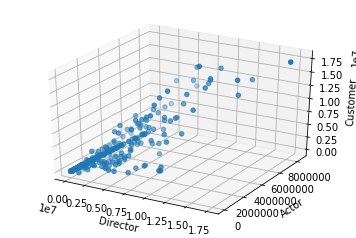

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

X = moviePandas.Director.to_list()
Y = moviePandas.Actor.to_list()
Z = moviePandas.Cumulative_Customer.to_list()

ax.scatter(X, Y, Z)

ax.set_xlabel('Director')
ax.set_ylabel('Actor')
ax.set_zlabel('Customer')

plt.show()
